### Bank Marketing Campaigns
### Joann Won
### 7/26/2022

### Introduction:

My chosen dataset is of marketing campaigns of a Portugese banking institution from May 2008 to June 2013:

https://archive.ics.uci.edu/ml/datasets/bank+marketing

A total of 52944 phone contacts are recorded in this dataset. The attributes of this data include telemarketing, candidate's status, and candidate's economic features as well. External data came from the central bank of Portugese Republic statisical website.

https://www.bportugal.pt/en

Out of a total of 150 attributes, 22 were selected as the most relevant in this dataset. 

The marketing campaign's target is the client subsribing to a term deposit. Telemarketing centers would contact the clients via phone call throughout marketing campaigns. The dataset description is unclear as to whether or not phone contacts were just home phones or mobile phones.

### Prior Work:

__1__

__Citation Information:__
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

__Summary of Results:__
In order to meet the demands for the increased capital requirements of banks, data mining and a decision support system were used to predict if the result of bank telemarketing calls would secure long-term deposits. Four models were explored: logistic regression, decision trees, neural network, and support vector machine. 22 most relevant features were chosen out of 150 input features based on company and economic attributes were used. The neural network model gave the best results among four trained models with an AUC value of 0.8.

__Limitations, biases, data shortcomings, and conclusions about what might be overlooked:__
The article concludes that the Euribor rate was a highly relevant attribute that predicted that clients would save more when the Euribor rate decreased. The Euribor rate is the interest rate at which a panel of European banks borrows funds from one another. Due to the context of a recession that hit, the Portuguese bank data’s most relevant attributes may not be helpful for an efficient telemarketing strategy during stable economic conditions. Additionally, the pressure for banks to meet a profit demand may have allocated more resources to telemarketing than usual which is not necessarily a profitable strategy for the long term.

__2__

__Citation Information:__
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

__Summary of Results:__
Cross-Industry Standard Process for Data Mining (CRISP-DM) iterations have allowed for a better model that is in tune with the business goals that is useful to improve bank marketing campaigns. With each iteration of the CRISP-DM, the models improved, with the best model being the support vector model with an AUC value of 0.938. The top five most relevant inputs for a marketing campaign were identified as call duration, the month of contact, the number of previous contacts, days since the last contact, the last contact result, and the first constant duration. 

__Limitations, biases, data shortcomings, and conclusions about what might be overlooked:__
No limitations, biases, or data shortcomings were described in this article. The article does mention that a possible expansion of this article would be to see if these predictive models can be achieved without contact-based information, which would further impede the customers’ privacy. A lot of the information that is being used to decide whether a customer should be contacted is provided by the customer to the banks initially for financial reasons and not for telemarketing purposes. The modern bank customer is wary of telemarketing strategies and does not prefer direct marketing calls from banks, so the application of this dataset to current banks may need to adapt for the digital bank customers.

__3__

__Citation Information:__
Tékouabou SCK, Gherghina ŞC, Toulni H, Neves Mata P, Mata MN, Martins JM. A Machine Learning Framework towards Bank Telemarketing Prediction. Journal of Risk and Financial Management. 2022; 15(6):269. https://doi.org/10.3390/jrfm15060269

__Summary of Results:__
Class-membership (CMB) classifier approach is proposed to transform heterogeneous data by processing data types. Due to the technological evolution that has allowed machine learning algorithms and data mining tools, more efficient forecasting of marketing campaigns and business adjustments have resulted. However, this means that rich data that is used such as volume, complexity, and heterogeneity that must be accounted for. Although the data mining ANN model was the best model with an AUC of 0.975, the CMB model is the 2nd best model with an AUC of 0.959.

__Limitations, biases, data shortcomings, and conclusions about what might be overlooked:__
The article mentions the shortcomings of heterogeneous data, achieving optimal performance, and using minimal resources. Usually, non-numerical variables in the data cause over-fitting or slowing down of the model, which is hopefully addressed by using the CMB approach. The article mentions limitations of the experiment protocol, in which they did not balance the data. Additionally, the article describes that some features of the dataset are not known until after a telemarketing call, such as the duration.


### Start of Workflow

In [1]:
import sklearn.datasets
import pandas as pd

df = pd.read_csv('bank-full.csv',sep = ';',encoding='mac_roman')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Going to pre-process the data so that the target (y) data is converted into a numerical data.
'Yes' will be replaced by 1 and 'No' will be replaced by 0

In [70]:
df['y'].replace(['yes','no'],[1,0],inplace=True)

In [143]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


## Visualization of Data

#### According to the dataset description:

    Y: has the client subscribed a term deposit? (binary: "yes","no")

We'll be visualizing different features to the target to see which features have the strongest relationship with y. Then we'll use a couple of those features to see if it's a strong predictor of our target.

#### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

<AxesSubplot:xlabel='campaign', ylabel='y'>

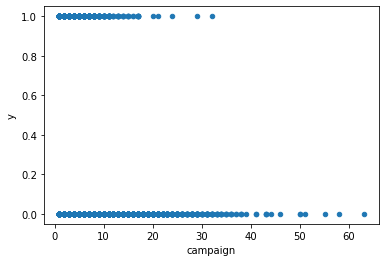

In [72]:
df.plot.scatter(x = 'campaign', y = 'y') 

#### pdays: number of days that passed by after the client was last contacted from a previous campaign

<AxesSubplot:xlabel='pdays', ylabel='y'>

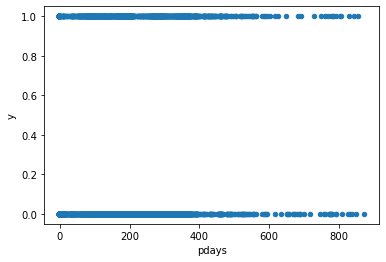

In [73]:
df.plot.scatter(x = 'pdays', y = 'y')

#### previous: number of contacts performed before this campaign and for this client

<AxesSubplot:xlabel='previous', ylabel='y'>

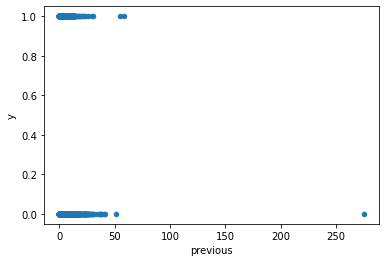

In [74]:
df.plot.scatter(x = 'previous', y = 'y')

#### duration: last contact duration, in seconds

<AxesSubplot:xlabel='duration', ylabel='y'>

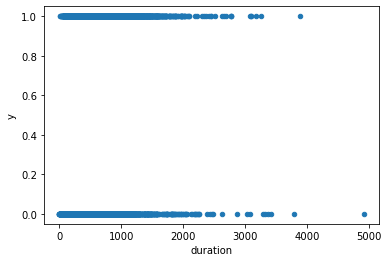

In [75]:
df.plot.scatter(x = 'duration', y = 'y')

Based on the visualizations, features 'previous','campaign', and 'duration' seem to show a stronger relationship with y. We'll be using those features as our 'x' variable going forward.

### Using KNN as first ML Method for classification
I am adding three features to 'x', and the target variable as 'y' for the classification model

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import accuracy_score
import sklearn.neighbors


#change data into a 2-D array format
x = df[['campaign','duration','previous']]
y = df['y']

In [77]:
x.shape

(45211, 3)

In [78]:
x

,campaign,duration,previous
0,1,261,0
1,1,151,0
2,1,76,0
3,1,92,0
4,1,198,0
...,...,...,...
45206,3,977,0
45207,2,456,0
45208,5,1127,3
45209,4,508,0


#### Cross-validating to select hyperparameters for n_neighbors for k-nearest neighbor's accuracy

In [79]:
from sklearn.model_selection import cross_val_score

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='accuracy')
loss

array([0.87268455, 0.87157866, 0.86978159, 0.87308171, 0.86810452])

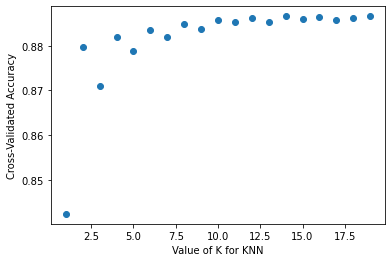

In [80]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='accuracy')
    k_scores.append(np.mean(loss))

plt.scatter(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We want to select the K that gives us the highest cross-validated accuracy score

In [94]:
def knntest(n=1):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

    model.fit(x_train,
              y_train)

    y_pred1 = model.predict(x_test)

    print('Accuracy_Knn = ', accuracy_score(y_test, y_pred1))

In [93]:
knntest(n=19)

Accuracy_Knn =  0.8803494415570055


In [91]:
knntest(n=14)

Accuracy_Knn =  0.8804600243282097


In [92]:
knntest(n=15)

Accuracy_Knn =  0.8814552692690479


n_neighbors = 15 is optimal to give us the highest accuracy score

#### Examining the accuracy of our model through confusion matrix and classification report

In [109]:
from sklearn.metrics import confusion_matrix

model.fit(x,y)

confusion_matrix(y, model.predict(x))

array([[38876,  1046],
       [ 3045,  2244]])

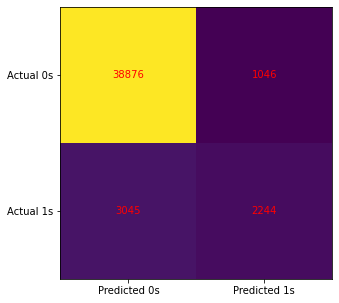

In [97]:
confmat = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(confmat)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confmat[i,j], ha='center', va='center', color = 'red')

plt.show()

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     39922
           1       0.68      0.42      0.52      5289

    accuracy                           0.91     45211
   macro avg       0.80      0.70      0.74     45211
weighted avg       0.90      0.91      0.90     45211



Accuracy (number of accurate predictions divided by the total number of predictions) score is high. Recall score (amount of positive cases being predicted correctly) for instances of 0 (clients didn't subscribe a deposit) is far greater than instances of 1 (clients did subscribe a deposit). Precision score (accurately predicted positive cases) of instances 0 is greater than instances of 1.

This model is poor at accurately classifying if clients will subsribe to a deposit based on the three features of a bank marketing campaign because the skew of the accuracy of instances of 0 makes it an imbalanced model.


### Utilize Logistic Regression as another ML method for classification

Splitting our data into training data and test data

In [102]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

In [103]:
model1 = sklearn.linear_model.LogisticRegression()

In [104]:
model1.fit(x_train,y_train)

LogisticRegression()

In [105]:
model1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

#### Examining the accuracy of our model through confusion matrix and classification report

In [144]:
model1.fit(x,y)

confusion_matrix(y, model1.predict(x))

array([[39292,   630],
       [ 4418,   871]])

>Let's visualize our confusion matrix

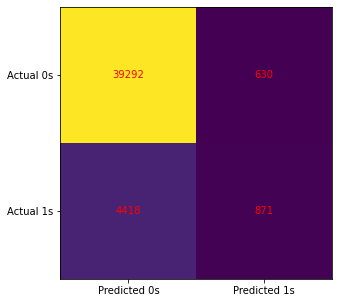

In [107]:
confmat = confusion_matrix(y, model1.predict(x))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(confmat)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confmat[i,j], ha='center', va='center', color = 'red')

plt.show()

In [108]:
print(classification_report(y, model1.predict(x)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.16      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Accuracy (number of accurate predictions divided by the total number of predictions) score is high. Recall score (amount of positive cases being predicted correctly) for instances of 0 (clients didn't subscribe a deposit) is far greater than instances of 1 (clients did subscribe a deposit). Precision score (accurately predicted positive cases) of instances 0 is greater than instances of 1.

Like the KNN model, this model is poor at accurately classifying if clients will subsribe to a deposit based on the three features of a bank marketing campaign because the skew of the accuracy of instances of 0 makes it an imbalanced model.


#### Plotting Receiver Operating Characteristic (ROC) Curve for better metric

In [141]:
lr_classifier = sklearn.linear_model.LogisticRegression()
x_train_scaled = sklearn.preprocessing.StandardScaler().fit_transform(x_train)
x_test_scaled = sklearn.preprocessing.StandardScaler().fit_transform(x_test)
lr_classifier.fit(x_train_scaled, y_train)
lr_y_pred = lr_classifier.predict(x_test_scaled)

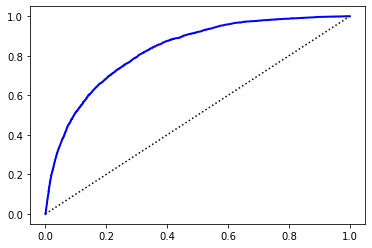

In [142]:
lr_falsePositiveRate, lr_truePositiveRate, lr_thresholds = sklearn.metrics.roc_curve(y_train, lr_y_scores[:,1])

plt.plot(lr_falsePositiveRate, lr_truePositiveRate,linewidth=2, color='blue')

plt.plot([0, 1], [0, 1], 'k:')


In [140]:
from sklearn import metrics

auc = metrics.auc(lr_falsePositiveRate,lr_truePositiveRate)

print('AUC =',auc)

AUC = 0.8299973042259277


The more the ROC curve hugs the top left corner, the better the model does at classifying accurately. An area under the curve (AUC) closer to 1 is a better model while an AUC of 0.5 is not.

This model has a curve that is closer to the top left corner and an AUC that is closer to 1. 

This regression model does a good job at classifying the data. 

### Comparison of KNN and Logistic Regression Model

##### KNN

In [110]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     39922
           1       0.68      0.42      0.52      5289

    accuracy                           0.91     45211
   macro avg       0.80      0.70      0.74     45211
weighted avg       0.90      0.91      0.90     45211



##### Logistic Regression

In [111]:
print(classification_report(y, model1.predict(x)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.16      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



KNN has greater overall precision and recall for both instances of 0 and 1. Accuracy is greater for Logisitc Regression, but precision and recall aren't the best in comparison to KNN model. Based on these metrics, KNN is a better model. However, due to the imbalanced models, ROC and/or AUC should be used to determine accuracy of model, as seen in the example I did for Logistic Regression.

### Findings Compared to Prior Work

My model used 3 relevant features compared to the 22 features used in article #1. Article #1's AUC was a value of 0.8, article #2's AUC was a value of  0.938, and article #3's AUC was a value of 0.959. My logistic Regression model's AUC was 0.82, which is higher than that of article #1 but lower than article #2 and #3's.

For article #1, the top five most relevant inputs for a marketing campaign were identified as call duration, the month of contact, the number of previous contacts, days since the last contact, the last contact result, and the first constant duration ('duration','month','previous','days','poutcome'). For article #2, the most relevant input was the Euribor rate. For both my KNN and Logistic Regression model, the three relevant features I used were call duration, the number of previous contacts, and number of contacts performed during this campaign and for this client ('duration','previous','campagin').

### Contextualizing Techniques and Findings

I used K-nearest neighbors and logistic regression models to train the model and focused on the accuracy score to determine the accuracy of the model. I used classification to understand if people who were categorized under different features were more likely to submit a deposit or not. I wanted to understand the shared qualities or attributes of clients who submitted a deposit. This is just another step into understanding consumer demographics for marketing purposes.

Those of interest to the findings of this project would be other banking institutions that are interested in improving their marketing strategies to confirm a long-term deposit to their bank. The 2008-2012 Portuguese data's historical context is of that in the aftermath of a financial crisis and where banking institutions' demand to retrieve the lost profit during that time launched several telemarketing campagins. 

In all types or marketing, allocation of resources to the campaign is discussed in relation to the success of campaigns. Therefore, in order to have an efficient marketing campaign, resources should be allocated efficiently and business goals must be met. 

With the recent Covid-19 pandemic making remote working a popular option amongst the workforce, as well as the digitization of banking, bank marketing campaigns have had to evolve. This is another instance of a financial dip in an economy that may prove useful to use the marketing strategies from the Portuguese dataset. 